# Lab 4: Free Fall and Air Drag

_Group Members_ :

In this lab you will investigate objects in free fall with air drag.  This means that we will investigate how objects fall due to gravity with the added affect of air resistance/ air drag.    

The first very thing we need to do is to import all the Python libraries we'll need.

In [ ]:
# Run this Python cell by selecting it and then pressing shift-enter
# Do not change anything in this cell
# These commands load the libraries for Python to use

import numpy as np
import scipy.special
import scipy.optimize
import matplotlib.pyplot as plt
from utilities import ball

In [ ]:
%matplotlib notebook

# Part One: Analytical Solution


When discussing kinematics, we have said 'these equations are based upon assuming the acceleration due to gravity is constant.'  For many objects this is true (such as you have done in previous labs).  The drag force, or an air resistance force that acts in the opposite direction of travel, is ignored for these kinematic calculations.  This is an okay approximation since the magnitude of the drag force relative to the magnitude of the gravitational force is very small.  However, not all objects can ignore their drag force.  An example of this is dropping a piece of paper.  This will slowly fall to the ground.  Now what would happen if you crumpled this paper into a ball?  It would fall much more quickly.  It is the air drag from the uncrumpled paper that causes the acceleration downward to be smaller than the crumpled paper.  

There are multiple factors that determine whether we need to account for drag force in calculations.  Look at the free body diagram below.  There is the density of the fluid the object is traveling through, the cross-sectional area, a drag constant that is dependent upon object shape, and the mass of the object.  Varying any of these will affect the magnitude of the drag force relative to the magnitude of the gravitational force.  In this lab, will be looking at systems where the drag force is important. 

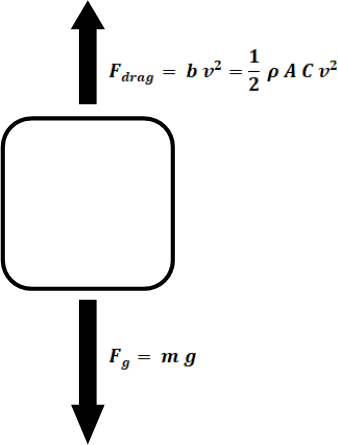

Air resistance is in the opposite direction of movement (it resists movement).  You will also see it written as $F_{drag} = - b v^2$ which already accounts for the force in the opposite direction of movement, where the $b$ coeffient is the variable that contains all the other variables that affect the drag force of a system, $b = \frac{1}{2} \rho A C$.  In vector notation, this force will be written as $\vec{F}_{drag} = - b v^2 \hat{v}$ since the force is in the opposite direction of the velocity.

**<font color=blue>Problem 4.1: Using the Free-Body diagram above, determine the algebaric sum of your forces in the vertical direction.  Make sure to include your acceleration.**

_Double click this cell to begin editing. Write your answer here._

The faster an object falls, the larger the air drag force is, which decreases the acceleration.  Over time, this acceleration will decrease to zero through this process.  Once the object is no longer accelerating, the velocity will not change.  This constant velocity is refered to as terminal velocity.  

**<font color=blue>Problem 4.2: What is the condition for calcuating the terminal velocity from your sum of forces equation you determined in question 1?  Calculate the terminal velocity.**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.3: What information do you need to know to be able to solve for terminal velocity this way?  Could this be be problematic to always know the terminal velocity of any object?**

_Double click this cell to begin editing. Write your answer here._

To numerically determine what the analytic terminal velocity should be, values for $\rho$, $A$, and $C$ need to be given. 


Below are tables for what common values are:

$\rho$ represents the density of the fluid the ball is travelling through (remember, air is a fluid).  Some common fluid densities are listed below:     

| Parameter                         |          Value         |       Units        |
| ---------                         |     --------------     |     ---------      |
| $\rho_{air}$                      |    1.225          |   $\frac{kg}{m^3}$ |
| $\rho_{water}$                    |    1000           |   $\frac{kg}{m^3}$ |
| $\rho_{ice}$                      |    916.7          |   $\frac{kg}{m^3}$ |
| $\rho_{helium}$                   |    0.179          |   $\frac{kg}{m^3}$ |
| $\rho_{hydrogen}$                 |    0.0898         |   $\frac{kg}{m^3}$ |


$A$ represents the cross-sectional area, which is what the 3 dimensional object would look like projected into a 2D plane.  Imagine looking at the shadow an object creates, this is the cross-sectional area of this object.  

| Parameter                         |          Value         |       Units        |
| ---------                         |     --------------     |     ---------      |
| $A_{sphere}$                      |    $\pi r^2$           |       $m^2$        |
| $A_{cube}$                        |    $l^2$               |       $m^2$        |
| $A_{box}$                         |    $l  w $        |       $m^2$        |
| $A_{cylinder}$ (length)           |    $2 r  h$       |       $m^2$        |
| $A_{cylinder}$ (width)            |    $\pi r^2$           |       $m^2$        |



$C$ is a drag coefficient constant that can be looked up in a table.  

| Parameter                         |          Value         |       Units        |
| ---------                         |     --------------     |     ---------      |
| $C_{Sphere}$                      |    0.47    |   N/A |
| $C_{Half-Sphere}$                 |    0.42    |   N/A |
| $C_{Cone}$                        |    0.50    |   N/A |
| $C_{Cube}$                        |    1.05    |   N/A |
| $C_{Streamlined Body}$            |    0.04    |   N/A |





Use a scale to measure the mass your ping pong ball.  Use calipers to determine the diameter of the ping pong ball, and calculate the radius.  Edit the table (double click on this cell) below to indicate this mass.

| Parameter                         |          Value         |       Units        |
| ---------                         |     --------------     |     ---------      |
| $mass$                            |            ??          |        ??          |
| $radius$                          |            ??          |        ??          |




**<font color=blue>Problem 4.4: Using the equation you derived in Question 1, plug in the for $m$, $\rho$, $A$, and $C$ to calculated a theoretical value for the terminal velocity of a ping pong ball.  Write this value below.  You will refer back to this value later.**

_Double click this cell to begin editing. Write your answer here._

This value will be our theoretical value for our terminal velocity, which will be refered back to throughout the rest of the lab.

# Part Two: Euler's Method


Part One we calculated a theoretical value for terminal velocity.  Now we we use Euler's Method to numerically determine **HOW** the ball reaches this terminal velocity, not just what this value is.  We can also verify that we numerically calculated a similar value to our theoretical value for terminal velocity.


Remember, if we know our acceleration $a$, the Euler's method itteration to calculate our velocity is $v = v + a \cdot dt$.

<font color=blue><strong>Problem 4.5: Noting that in euler's method we update kinematic variables
* $a_{new} = F/m$
* $v_{new} = v_{old} + a\cdot dt$
* $r_{new} = r_{old} + v\cdot dt$
    
which _one_ quantity do we need to change to account for drag compared to when we only used gravity?

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 4.1: Change the values for `m` and `radius` to the values you measured in Part One.  Change the values for `rho`, `A`, and `C` to the same values you used in Part 1.  After you have changed these, run the code block.**


In [ ]:
##Edit these values below to change the drag force coefficients 
mass = ???
radius = ???
rho = ???
A = ??? #To use pi, the syntax is np.pi
C = ???

b = (1/2)*rho*A*C


print('Mass is:', mass,'kg')
print('Fluid density is:', rho,'kg/m^3')
print('Radius is:', radius,'m')
print('Cross-sectional area is:', A,'m^2')
print('Drag coefficient is:', C)
print('Drag constant is:', b, 'kg/m')

**<font color=blue>Problem 4.6: What is the _direction_ and _magnitude_ of the drag force? Write them separately below.**

_Double click this cell to begin editing. Write your answer here._

**<font color=red>Code Task 4.2: Change the force equation to account for the air drag in the code below (remember that your force is now dependent upon $m$, $b$, and $v$) by inputting the value for `dragMagnitude` from your answer to Problem 4.6. The direction has been added for you.   After you have finished, run the code block.**


In [ ]:
g = 9.81  # m/s^2

#The variables you will give (variables you pass) to your force calculation are in the parentheses. Do not edit.
def force(mass,b,v): 
    
    gravityMagnitude = mass*g
    
    ####### EDIT THIS LINES #######
    
    # use 'np.dot(v,v)' to take the magnitude squared of the velocity vector
    dragMagnitude = ???
    
    ####### FINISH EDIT #######
    
    # gravity always points down, in -y direction
    gravityDirection = np.array([0,-1,0])
    # drag always points in the direction opposite the velocity
    dragDirection = np.array([0,1,0])
    # it would be better to use -v/|v| but since the initial velocity is (0,0,0), 
    # python complains about dividing by zero. The ball falls straight down 
    
    output_force = gravityMagnitude*gravityDirection + dragMagnitude*dragDirection

    return output_force


The same code for Euler's Method you used in Lab 2 is used in the `utilities.py` file and imported here.  

**<font color=red>Code Task 4.4: Run the code below to create position, velocity, and acceleration plots for your ball under the influence of gravity and drag. You can change the time step `dt` and total time or characteristic time `T_c` to answer the questions that follow**

In [ ]:
#import eulers method code
from utilities import eulersMethod


####### EDIT THESE LINES #######
# Characteristic time
T_c = 1
# Time step
dt = 0.05
####### FINISH EDIT #######

ball_1 = ball(m=mass, r=np.array([0,100,0]))

eulersMethod(ball_1,mass,b,T_c,dt,force)

**<font color=blue>Problem 4.7: How long of time $T_c$ do you have to have to determine what the terminal velocity is (run the code above as many times as you need to determine this, while changing the  $T_c$ and $dT$ values)?  How does the step size $dT$ affect the output?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.8: How would you describe the shape of acceleration, velocity, and position plots (once you have determined you are seeing behavior that is indicative of reaching terminal velocity)?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.9: How would you determine terminal velocity from the position graph?  If this was experimental data, what function would you fit to the end part to determine a terminal velocity?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.10: How would you determine terminal velocity from the velocity graph?  What is this value?**

_Double click this cell to begin editing. Write your answer here._

# Part Three: Fitting Position to a Linear Function


Video record your lab partner dropping a ping pong ball from at least 2 meters (the higher the better - the stairwell between Randall and West Hall is a great place to do this).  Refer to the 'How To Tracker' guide of how to load the video and autotrack the ping pong ball.  It is suggested to use a higher frames per second rate than the standard 30 fps, if that is available to you.   

**<font color=green>Note: For the online version of this course, you will be given this video.**

Once you have auto tracked your ping pong ball through your video, go to the `View` menu, and select `Data Tool (Analyze...)` This will open a new Tracker window.  Here, select `Analyze` and then select `Curve Fits`.   

In Lab 1 and 3 you fit your data to functions in Python.  Here, Tracker uses its own algorithm to do the same.  


At terminal velocity, the ball is not accelerating any more.  The kinematic relationship to determine the velocity from the position is then $x(t) = x_0 + v*t$, which is a linear relationship.  When you are not at terminal velocity, remember that $x(t) = v*t + \frac{1}{2} a t^2$, so the linear fit will only be true at the end of the video.  **Fit the later times only to a linear function.**

You should get a graph that looks something like ( _note, the numbers in this figure are intentionally very different from what you should get_ ):

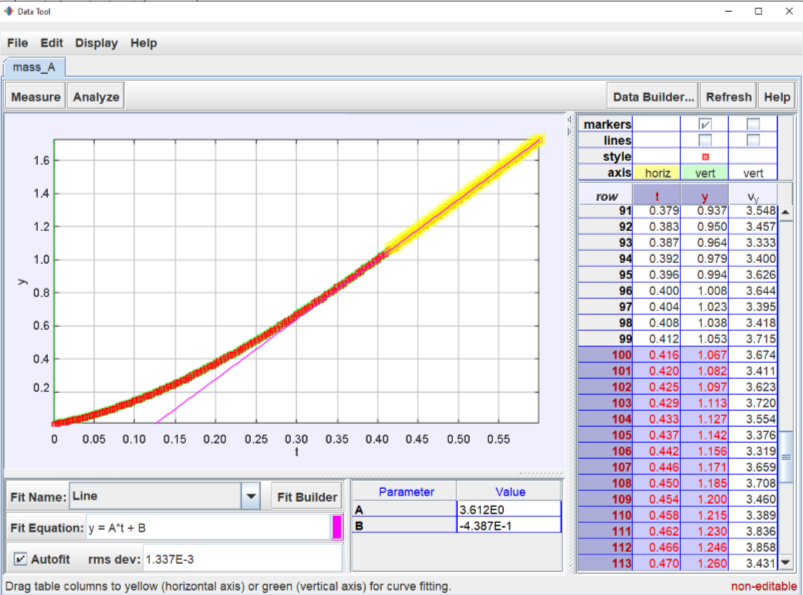

**<font color=blue>Problem 4.11: How did you and you lab partner determine what part of the data to fit to (what determined the 'later times')?  What were your parameters for determining how linear the function is?**

_Double click this cell to begin editing. Write your answer here._

Add your own screenshots to the cell below.  To take a screenshot, press **Windows+PrtSc** or **Windows+Shift+S.** To insert the screenshot here, double-click on the cell below and select **Edit > Insert Image.** Click **Browse...,** then navigate to **This PC > Pictures > Screenshots** and select the file with the highest number. Click **Open,** then **OK.** Finally, press **Shift+Enter** to display the image.

_Put your data screenshot here._

Type your parameters below:

| Parameter                         |          Value         |     
| ---------                         |     --------------     |    
| A                                 |            ??          |    
| B                                 |            ??          |   




**<font color=blue>Problem 4.12: What is the terminal velocity you experimentally determined from the position data?**

_Double click this cell to begin editing. Write your answer here._

# Part Four: Fitting Velocity to a Hyperbolic Tangent Function

Using the same data set from Part Three, we will fit our velocity to a function.  This will involve a hyperbolic tangent function, which is defined as $\tanh \left(x \right) = \frac{e^x - e^{-x} }{e^x + e^{-x}}$.  You do not need to know the derivation to determine the velocity, but it is included at the end of the lab if you are curious.  

After the derivation, the velocity as a function of time is $$v(T) = v_0 \tanh\left( \frac{g}{v_0} (T-T_0) \right) $$

It is important to note that there is a difference between a hyperbolic tangent and a tangent function, so be careful inputting your functions!  

In your Tracker window, go back to the main window (exit out of the `Data Analysis` window).  In the graph on the right, click on the label on the vertical axis.  This should bring up a large menu of options of what to plot.  Select the velocity in the same direction (either x or y depending on how you set your coordinate system).  You should see your velocity leveling off, but not quite to terminal velocity yet (determines on how far your ping pong ball travelled before reaching the ground).   

**<font color=blue>Problem 4.13: Why does there appear to be a lot of noise in your velocity (especially if your position data did not have a large variance)?  Where does this come from?**

_Double click this cell to begin editing. Write your answer here._

Now re-open the `Data Analysis` window, and you should see your velocity plotted.  If you see both your velocity and position graphed, click off the position in the data table on the right.  In the `Analyze` menu, select `Curve Fit`.  You will now need to create your own function which can be done by clicking fit builder.

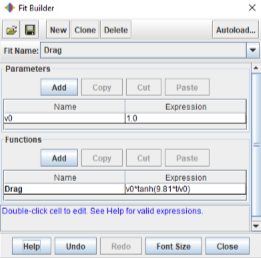

You can create your own function and parameters.  First, select `New` at the top, and then create a fitting function.  Fit to $v_0 \tanh\left( \frac{g}{v_0} (T-T_0) \right)$ (three variables).  Select `Close` when you have created your new fit function.  Select this one to fit your data to.  


You should get a graph that looks something like ( _note, the numbers in this figure are intentionally very different from what you should get_ ):

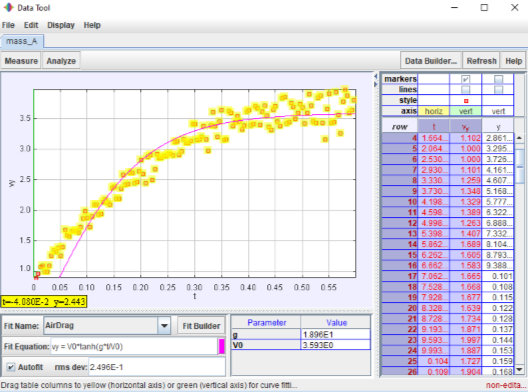

Add your own screenshots to the cell below.  To take a screenshot, press **Windows+PrtSc** or **Windows+Shift+S.** To insert the screenshot here, double-click on the cell below and select **Edit > Insert Image.** Click **Browse...,** then navigate to **This PC > Pictures > Screenshots** and select the file with the highest number. Click **Open,** then **OK.** Finally, press **Shift+Enter** to display the image.

_Put your data screenshot here._

Type your parameters below:

| Parameter                         |          Value         |     
| ---------                         |     --------------     |    
| A                                 |            ??          |    
| B                                 |            ??          |   




**<font color=blue>Problem 4.14: What is the terminal velocity you experimentally determined from the position data?**

_Double click this cell to begin editing. Write your answer here._

# Culminating Assessment Task

In the table below, record the four seperate values you determined for your terminal velocity.


| Parameter                         |          Value         |       Units        |
| ---------                         |     --------------     |     ---------      |
| $v_0$ Part One                    |            ??          |        ??          |
| $v_0$ Part Two                    |            ??          |        ??          |
| $v_0$ Part Three                  |            ??          |        ??          |
| $v_0$ Part Four                   |            ??          |        ??          |





Percent error is determined by the difference in your experimental value to your theoretical value, normalized by the theoretical value.  Algebarically, this is $$PE = \left| \frac{x_t - x_e}{x_t} \right| \cdot 100.$$  Use the value you calculated in Part One as your theoretical value, determine the percent error from Parts 2,3, and 4.  Put those values in the table below.


| Parameter                         |          Value         |      
| ---------                         |     --------------     |    
| $PE_{21}$                         |            ??          |       
| $PE_{31}$                         |            ??          |  
| $PE_{41}$                         |            ??          |  





**<font color=blue>Problem 4.15: Discuss your percent error values here.  You have one numerical calculation and two experimental data values.  Of the experimental data values, which has the lowest percent error?  What assumption did we make with the fit we used to determine the terminal velocity may have not been a correct assumption?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.16: Now, imagine we drop a ping pong ball through an unknown fluid.  Calculate what the fluid density must be for a terminal velocity of $v_0 = 22.4 \frac{m}{s}$.  Which fluid is this from the chart in Part One?**

_Double click this cell to begin editing. Write your answer here._

**<font color=blue>Problem 4.17: What is important about a ping pong ball that air drag plays a significant role (as compared to a tennis ball)?**

_Double click this cell to begin editing. Write your answer here._

### <center>You're done! Submit your lab per the following instructions.<font color=white><#!S!#>

* Save this file with the lab number and group number to submit to canvas, e.g. `group01_lab01.ipynb`. 
* You only need to submit one file as a group to the canvas assignment and it will count for all group members.
* The group recorder should still send the worksheet to their group members so they have a copy.
* Save the file as a html file. You can do this by opening the `File` tab on the top left corner of Jupyter, then select `Download as > html (.html)`
* Submit both the .ipynb and .html files to canvas under the `Lab 4: Free Fall and Drag` assignment.

# Stretch Goals
Want to stretch your math and physics skills?  Work through the velocity derivation for the hyperbolic tangent used in Part 4.

Below is the derivation of the velocity as a function of time:

To derive the equation to fit the velocity to, we need to derive it.  Starting at the force equation, we have $$F = m a = m \frac{d v}{dt} = m g - b v^2,$$ which can also be written as $$\frac{m}{b} \frac{d v}{dt} = \frac{mg}{b} -  v^2.$$  Seperating the variables to either side of the equation, this is $$ \frac{1}{ \frac{m g}{b} -  v^2} dv = \frac{b}{m} dt .$$


At this point, we will need to u-sub and use an integral table to solve.  Choose $w^2 = \frac{m g}{b}$ to give $$\frac{1}{ w^2 -  v^2} dv = \frac{b}{m} dt.$$  We will integrate both sides from $v=0$ to $v=v_0$ and $t=T_0$ to $t=T$  $$\int_{v=0}^{v=v(T)} \frac{1}{ w^2 -  v^2} dv = \int_{t=T_0}^{t=T}  \frac{b}{m} dt.$$  An integral table gives that $\int \frac{1}{b^2 - x^2} dx = \frac{1}{b} \tanh^{-1}\left( \frac{x}{b} \right) + C,$ which is a hyperbolic tangent.  This gives $$\frac{1}{w} \tanh^{-1}\left( \frac{v}{w} \right) |_{v=0}^{v=v(T)} = \frac{b}{m} t |_{t=T_0}^{t=T}  ,$$ and $\tanh^{-1}\left( 0 \right) = 0$ gives $$\frac{1}{w} \tanh^{-1}\left( \frac{v(t)}{w} \right) = \frac{b}{m} (T-T_0) .$$


Now $w = \sqrt{\frac{m g}{b}}$ which you should recognize as terminal velocity from your calculation in Part One, and $w \frac{b}{m}$ is $\sqrt{\frac{b g}{m}} = \frac{g}{w} = \frac{g}{v_0}$, so $$ \tanh^{-1}\left( \frac{v(T)}{v_0} \right) = \frac{g}{v_0} (T-T_0) .$$  This gives that $$\tanh\left( \frac{g}{v_0} (T-T_0) \right) = \frac{v(T) }{v_0}.$$ 

Our velocity as a function of time is $$v(T) = v_0 \tanh\left( \frac{g}{v_0} (T-T_0) \right) $$